In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rsbeams.rsdata.SDDS import readSDDS
from rsbeams.rsplot import beam_plots

In [2]:
basename = 'verify_lattice'

# Twiss File

In [3]:
twiss_file = readSDDS(f'{basename}.twi')
twiss_file.read()
twiss_parameters = twiss_file.parameters
twiss = twiss_file.columns

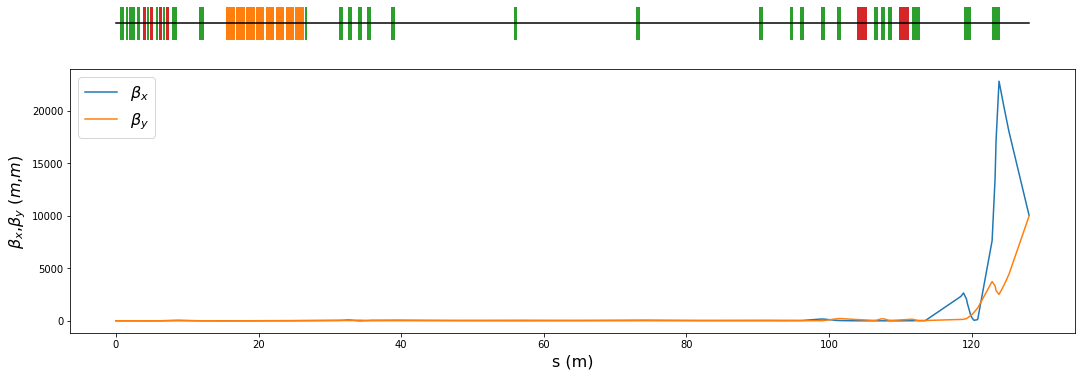

In [4]:
beam_plots.beamline_profile(twiss_file, quantities=['betax', 'betay'])

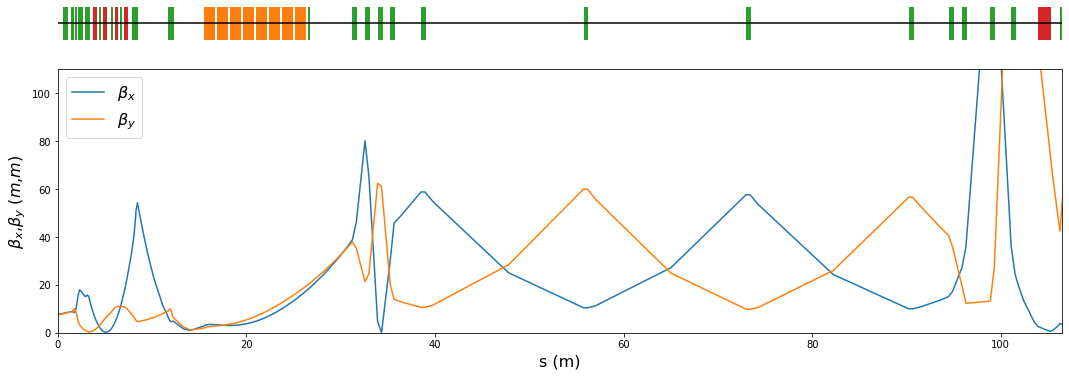

In [14]:
beam_plots.beamline_profile(twiss_file, quantities=['betax', 'betay'], xlim=(0, 106.5), ylim=(0, 110.))

# Sigma File

In [6]:
sig_file = readSDDS(f'{basename}.sig')
sig_file.read()
sig_parameters = sig_file.parameters
sig = sig_file.columns

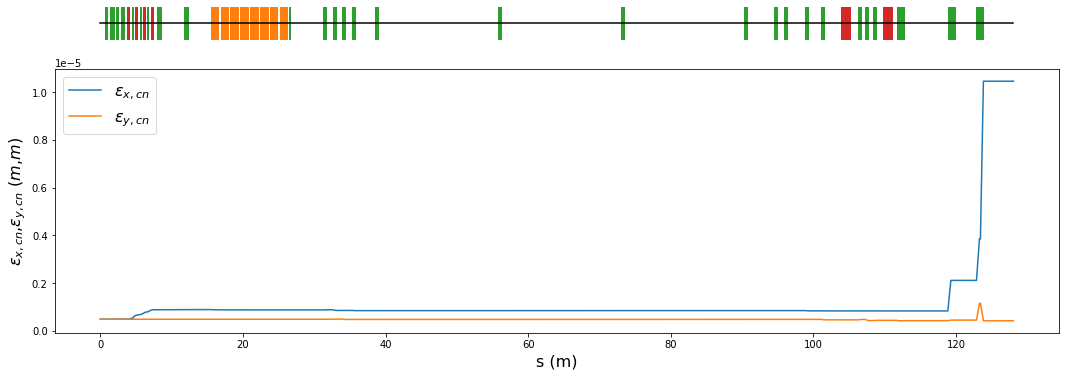

In [7]:
beam_plots.beamline_profile(sig_file, quantities=['ecnx', 'ecny'])

# Matrix File

In [15]:
mat_file = readSDDS(f'{basename}.mat')
mat_file.read()
mat_parameters = mat_file.parameters
mat = mat_file.columns

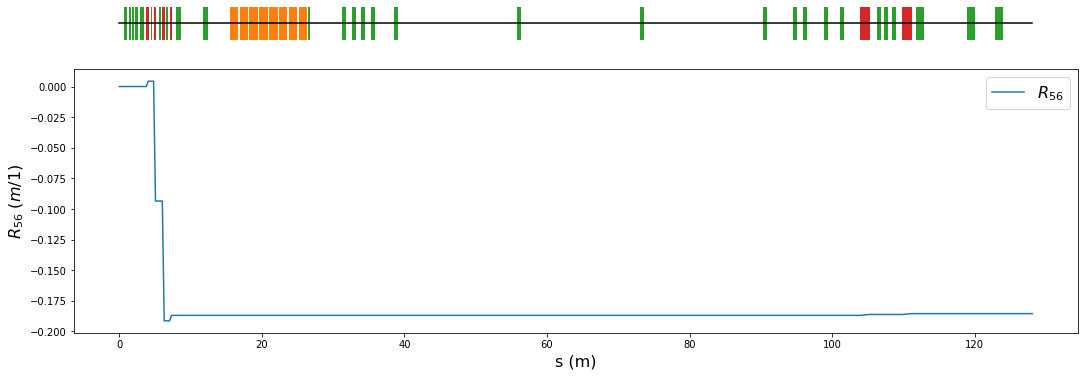

In [16]:
beam_plots.beamline_profile(mat_file, quantities=['R56', ])

# X506_EID Watchpoint Immediately Upstream of D600 Dipole

In [8]:
x506_file = readSDDS('FODOend_todump.X506_EID')
x506_file.read()
x506_parameters = x506_file.parameters
x506 = x506_file.columns 

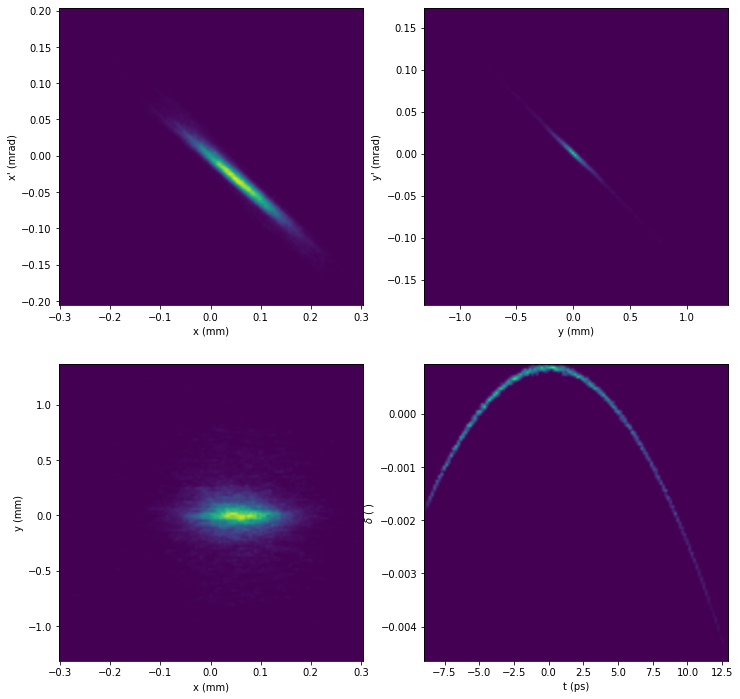

In [9]:
beam_plots.phase_space(x506_file)

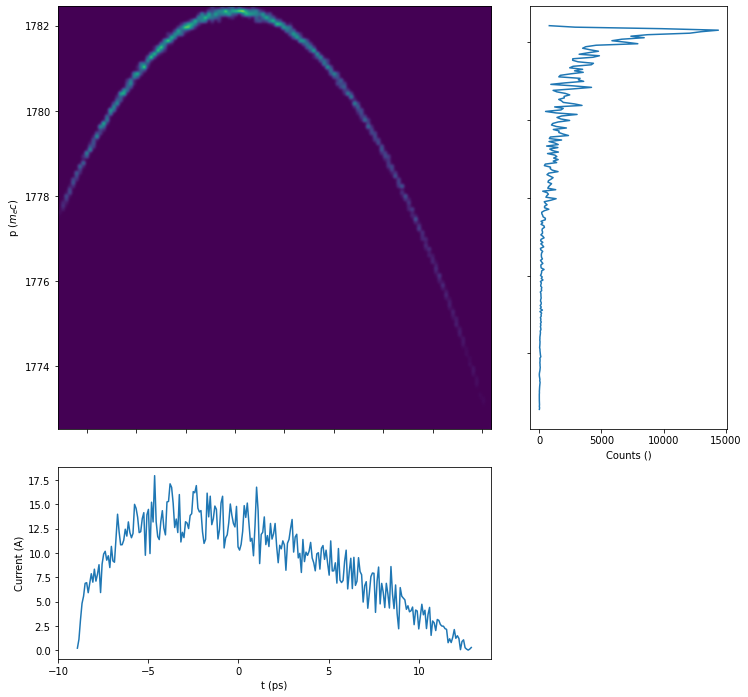

In [10]:
beam_plots.longitudinal_phase_space(x506_file)

# Staring Distribution

In [15]:
fort50_file = readSDDS('daniel_fort50_8m_D5.sdds')
fort50_file.read()
fort50_parameters = fort50_file.parameters
fort50 = fort50_file.columns 

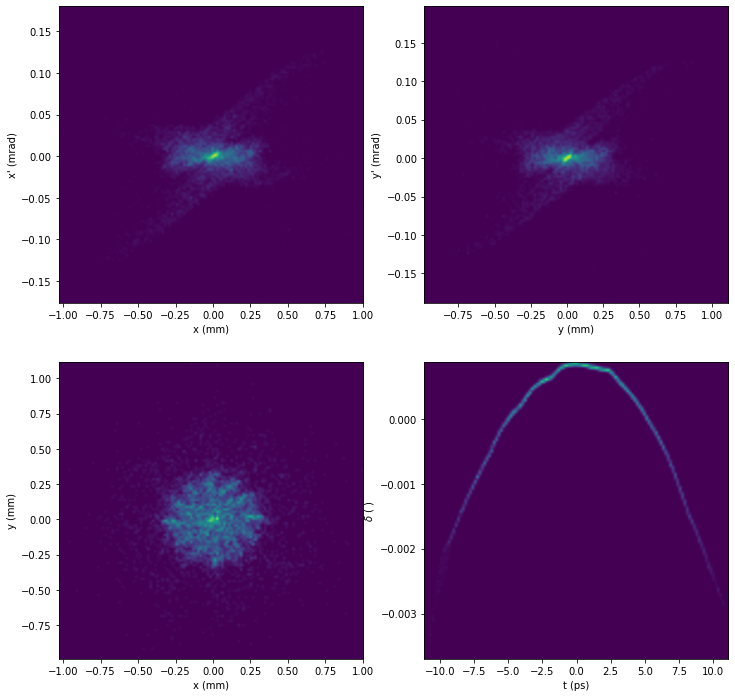

In [16]:
beam_plots.phase_space(fort50_file)

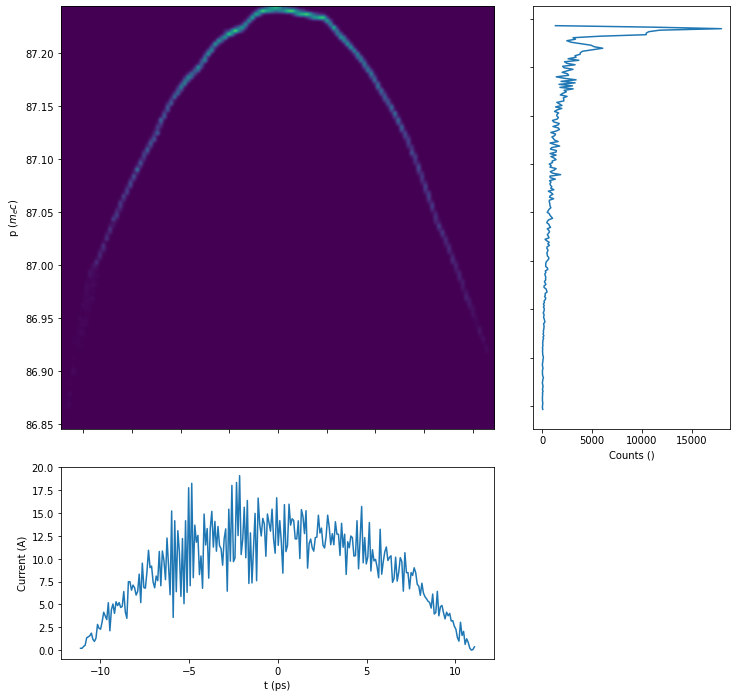

In [18]:
beam_plots.longitudinal_phase_space(fort50_file)

# Compression Estimate

In [24]:
from scipy.constants import c as clight

In [22]:
bc1_mat_file = readSDDS(f'bc1_matrix.mat')
bc1_mat_file.read()
bc1_mat_parameters = bc1_mat_file.parameters
bc1_mat = bc1_mat_file.columns

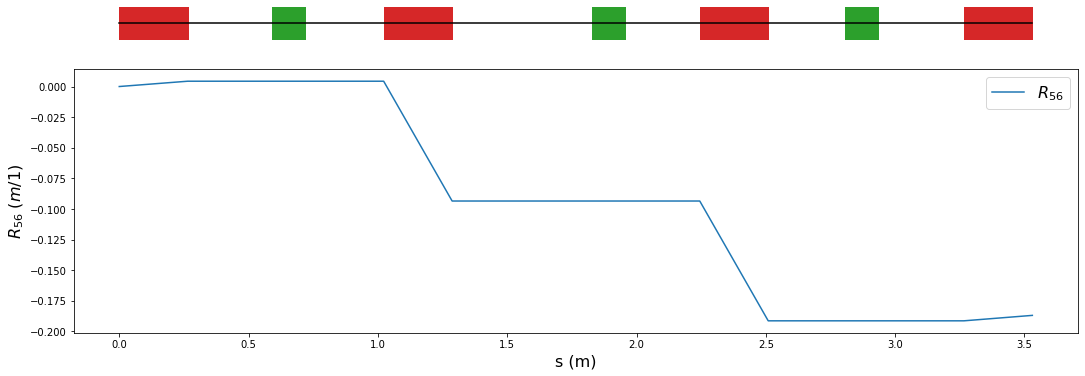

In [23]:
beam_plots.beamline_profile(bc1_mat_file, quantities=['R56', ])

In [66]:
bc1_r56 = bc1_mat_file.columns['R56'][-1]
cc_freq = 1.3e9

In [67]:
phi_rf = 80 #np.linspace(60, 120, 20)
E_rf = 59.0  # MV
E_start = 4.063  # MeV
k = 2 * np.pi * cc_freq / clight  # 1/m
L2_slope = E_rf* k * np.cos(phi_rf * np.pi / 180.) / (E_start + E_rf * np.sin(phi_rf * np.pi / 180.))